<a href="https://colab.research.google.com/github/NURobotics/ASEE/blob/master/Copy_of_Winter_2023_Week_3_%26_4_Exercise_ML_Basics_for_Recommendation_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Winter 2023 - Week 3 & 4 Exercise: ML Basics for Recommendation Systems

> Indented block



In this week's exercise, you are going to use a Spotify dataset prepared by Julia to practice your skills with fitting. You will also get a little bit of practice with prediction (which we will cover in more depth next week)!

In [ ]:
import pandas as pd

In [ ]:
# Link to the Spotify dataset we will be using (publicly available on the RAISO GitHub)
# url = "https://raw.githubusercontent.com/blake-hu/raiso-projects/main/winter23/datasets/spotify_data.csv"
url = "https://raw.githubusercontent.com/blake-hu/raiso-projects/main/winter23/datasets/spotify_data_new.csv"

# Reading dataset into pandas DataFrame
data = pd.read_csv(url)

In [ ]:
# It's always nice to take a sneak peek to ensure that everything worked properly!
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,stars
0,0.885,0.693750,11,-8.813,1,0.0378,0.4270,0.000204,0.0759,0.728,78.505719,2jiPHbFX5XM8TjaTfYJ0eo,313684,4,3
1,0.716,0.440639,7,-7.355,1,0.1220,0.0703,0.000000,0.2240,0.344,50.078381,74tLlkN3rgVzRqQJgPfink,386907,4,2
2,0.712,0.216160,11,-7.689,1,0.0314,0.7520,0.000000,0.1090,0.317,25.081362,04GpBu5gm14iLJRfmwi4RS,283361,4,1
3,0.833,0.276860,2,-8.795,1,0.4310,0.0102,0.021900,0.1650,0.281,25.081532,0VgkVdmE4gld66l8iyGjgx,204600,4,1
4,0.588,0.409614,11,-10.793,1,0.0449,0.6560,0.000000,0.1170,0.233,50.086518,6aByRVbCySiT5oiJqz0QzD,290615,4,2


In [ ]:
# Split data into attributes (X) and labels (y)
# Examples of attributes: "danceability", "energy", "key", etc.
X = data.drop(['id', 'stars'], axis=1) # Dropping the 'id' column to simplify things (it's not a very relevant metric)
y = data['stars']

In [ ]:
# TODO: Randomly split data into training set and test set using train_test_split().
# We will make the test set 20% of the total dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
# Instantiate a regressor object from the DecisionTreeClassifier class
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

In [ ]:
# TODO: Fit regressor to X and y of training set using the fit() method of the regressor object
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Use fitted regressor to predict which songs will be liked from test set X-values (attributes)
y_pred = regressor.predict(X_test)

In [ ]:
# Convert 0-5 star ratings to liked/not-liked categories. 0-2 are not-liked, 3-5 are liked
y_test = y_test.reset_index(drop=True)
y_pred_discrete = y_pred.copy()
y_test_discrete = y_test.copy()

for i in range(len(y_pred)):
  if y_pred[i] > 2.5: # liked
    y_pred_discrete[i] = 1
  else: # not liked
    y_pred_discrete[i] = 0

for i in range(len(y_test)):
  if y_test[i] > 2.5: # liked
    y_test_discrete[i] = 1
  else: # not liked
    y_test_discrete[i] = 0

In [ ]:
# Import sk-learn metrics functions and seaborn data visualization package
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import seaborn

In [ ]:
# TODO: Create confusion matrix and classification report for output with discrete categories
classification_report_categorical = classification_report(y_test_discrete, y_pred_discrete)
confusion_matrix_categorical = confusion_matrix(y_test_discrete, y_pred_discrete)

In [ ]:
# TODO: Calculate mean squared error for continuous output
mean_sq_err = mean_squared_error(y_test, y_pred)



 Classification report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion matrix: 

 [[7 0]
 [0 5]] 




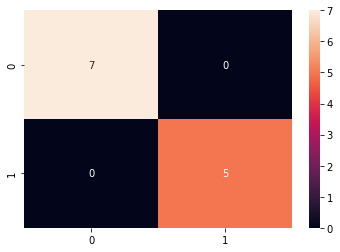

In [ ]:
# Print Classification Metrics
print('\n\n Classification report: \n\n', classification_report_categorical)
print('Confusion matrix: \n\n', confusion_matrix_categorical, "\n\n")
seaborn.heatmap(confusion_matrix_categorical, annot=True)

In [ ]:
# Print Regression Metrics
print('\n\n Mean-squared error: ', round(mean_sq_err, 3))



 Mean-squared error:  0.0


[Text(0.5, 0.875, 'X[1] <= 0.544\nsquared_error = 2.243\nsamples = 48\nvalue = 2.583'),
 Text(0.3, 0.625, 'X[10] <= 37.554\nsquared_error = 0.603\nsamples = 22\nvalue = 1.182'),
 Text(0.2, 0.375, 'X[10] <= 12.561\nsquared_error = 0.237\nsamples = 13\nvalue = 0.615'),
 Text(0.1, 0.125, 'squared_error = 0.0\nsamples = 5\nvalue = 0.0'),
 Text(0.3, 0.125, 'squared_error = 0.0\nsamples = 8\nvalue = 1.0'),
 Text(0.4, 0.375, 'squared_error = 0.0\nsamples = 9\nvalue = 2.0'),
 Text(0.7, 0.625, 'X[1] <= 0.75\nsquared_error = 0.562\nsamples = 26\nvalue = 3.769'),
 Text(0.6, 0.375, 'squared_error = 0.0\nsamples = 11\nvalue = 3.0'),
 Text(0.8, 0.375, 'X[10] <= 112.567\nsquared_error = 0.222\nsamples = 15\nvalue = 4.333'),
 Text(0.7, 0.125, 'squared_error = 0.0\nsamples = 10\nvalue = 4.0'),
 Text(0.9, 0.125, 'squared_error = 0.0\nsamples = 5\nvalue = 5.0')]

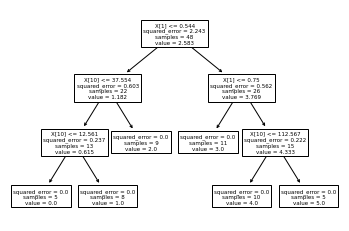

In [ ]:
# Plot tree decision nodes and parameters
from sklearn.tree import plot_tree
plot_tree(regressor)

In [ ]:
# TODO: Now make your own pandas DataFrame with two rows.
# Each row should contain values roughly describing attributes of a song you like.
# Include all the attributes we used above except 'id' and 'liked.'


In [ ]:
# TODO: Use fitted regressor to predict which of the 2 songs will be liked from X_new.
# TODO: Store the result in a variable named y_new, and add that as a new column named "liked" in X_new.

# When you're done, take a look at your results and think about which song attributes are conducive
# to getting likes in our dataset.